# kor-eng translation model - 2 / 220913

1. 데이터 수집 분담 
2. BeautifulSoup / Selenium
3. BeautifulSoup / Selenium 사용

### 1. 데이터 수집 분담

**멜론에서 데이터 크롤링**

**사이트 접속 후 아래 부분으로 내려가면 '1-50위', '51-100위' 나누어져 있음.**


* 70년대 은수 - https://www.melon.com/chart/age/index.htm?chartType=AG&chartGenre=KPOP&chartDate=1970
* 80년대 종석 - https://www.melon.com/chart/age/index.htm?chartType=AG&chartGenre=KPOP&chartDate=1980
* 90년대 민지 - https://www.melon.com/chart/age/index.htm?chartType=AG&chartGenre=KPOP&chartDate=1990
* 00년대 다연 - https://www.melon.com/chart/age/index.htm?chartType=AG&chartGenre=KPOP&chartDate=2000
* 10년대 준혁 - https://www.melon.com/chart/age/index.htm?chartType=AG&chartGenre=KPOP&chartDate=2010

**자신의 연도의 1-100위 노래 크롤링해서 아래의 형태의 csv 파일로 저장하기**

|노래 제목|노래 가수|가사|
|---|---|---|
|Gift|박효신|누가 뭐래도 나는 약하지 않다고 눈물로 참던 날들 나를 모르고 나를 말하는 얘기도 듣고 싶지 않았어 '''
|Sincerity Is Scary|The 1975|Irony is okay I suppose Culture is to blame You try and mask your pain in the most postmodern way You lack substance when you say'''|
|잠시만 안녕|엠씨더맥스|행복을 줄 수 없었어 그런데 사랑을 했어 니곁에 감히 머무른'''|

### 2. BeautifulSoup / Selenium

**Beautifulsoup**
- HTML, XML파일의 정보를 추출해내는 python library
- python 내장 모듈인 request나 urllib을 이용해 HTML을 다운 받고, beautifulsoup으로 데이터를 추출
- REST API에서 데이터를 가져올 때에도 사용됨
- 서버에서 HTML을 다운받음
- HTML을 파싱하고 데이터를 크롤링 하는데에만 쓰임

**-> 정적인 웹페이지에서 주로 활용하며 별도의 페이지 조작 없이 html을 가져와서 parsing 하기 때문에 빠름. 동적인 웹페이지 사용하기 힘듬.**


**Selenium**
- 자동화 테스트(버튼 클릭, 스크롤 조작 등등)에 사용되는 프레임워크
- 셀레늄을 이용한 크롤러는 웹 페이지에서 javascript 렌더링을 통해 생성되는 데이터들을 손쉽게 가져올 수 있음
- 인터넷 브라우저를 통해 크롤링을 하는 개념이라, 실제 보여지는 웹 페이지의 전부를 가져올 수 있고, 디버깅 방법 또한 직관적
- 웹 브라우저를 실제로 진행시키는 방법이기 때문에 속도도 많이 느리고, 메모리도 상대적으로 많이 차지
- 멀티프로세스를 사용해서 여러 브라우저로 크롤링 하도록 하면 속도를 일정 부분 개선가능
- 페이지의 단일 element에 접근하는 메소드

**-> 계속 움직이는 페이지를 제어할 수 있음. 브라우저를 통해 실행되서 상대적으로 느림.**

### 3. BeautifulSoup / Selenium 사용

둘중에 편한거 쓰면되고, 같이 써도 되고.

자세한 활용법은 구글링하면 잘 나오는데 

초기세팅 과정은 오류가 나는 것들이 많아서 초기세팅만 적어둘께

**Beautifulsoup**

패키지 설치
> pip3 install beautifulsoup4 

실행 코드는 구글링해서 코드 비슷하게 하면 될껀데 멜론 사이트 들어가면 406 Error 발생함.

사용자의 정보를 나타내는 헤더값이 없어서 사람이 접속하지 않았다고 판단해 막은거임.

아래 코드 추가해서 헤더 추가해주면 됨.

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'

headers = { 'User-agent' : user_agent}

response = requests.get(url, headers=headers)



<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
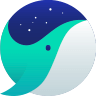
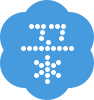

In [16]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.naver.com'

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'
headers = { 'User-agent' : user_agent}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    print(html)

else :
    print(response.status_code)

**Selenium**

패키지 설치
컴퓨터 터미널 창에 명령어 입력
> pip3 install selenium

> pip3 install webdriver-manager

이거는 selenium이 최근에 바뀌어서 그런가 브라우저 설정 구글링 코드가 잘안되던데 이렇게 하면 됨!

In [17]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

service = Service(executable_path=ChromeDriverManager().install())
options = webdriver.ChromeOptions()

driver = webdriver.Chrome(service=service, options=options)
driver.get('https://www.naver.com')